<a href="https://colab.research.google.com/github/m-volnykh/BasisOfMachineLearning/blob/main/LR02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2: Деревья решений
Выполнила Вольных М.В., 3 курс ИВТ, 2-1

## Подготовка данных

In [ ]:
#импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics
from sklearn import model_selection

In [ ]:
%%capture
!git clone https://github.com/m-volnykh/BasisOfMachineLearning

In [ ]:
data = pd.read_csv('/content/BasisOfMachineLearning/Lab2/voice_gender.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
data.shape

(3168, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Проверка пропусков в датасете

In [ ]:
data.isnull().sum().sum()

np.int64(0)

Подготовка тренировочной и тестовой выборки

In [ ]:
from sklearn.model_selection import train_test_split #сплитование выборки

#X - матрица наблюдений, y - столбец правильных ответов
X = data.drop('label', axis=1)
y = data['label']

#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=40
)
#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


## Задание 1. Решающие пни


Обучение модели

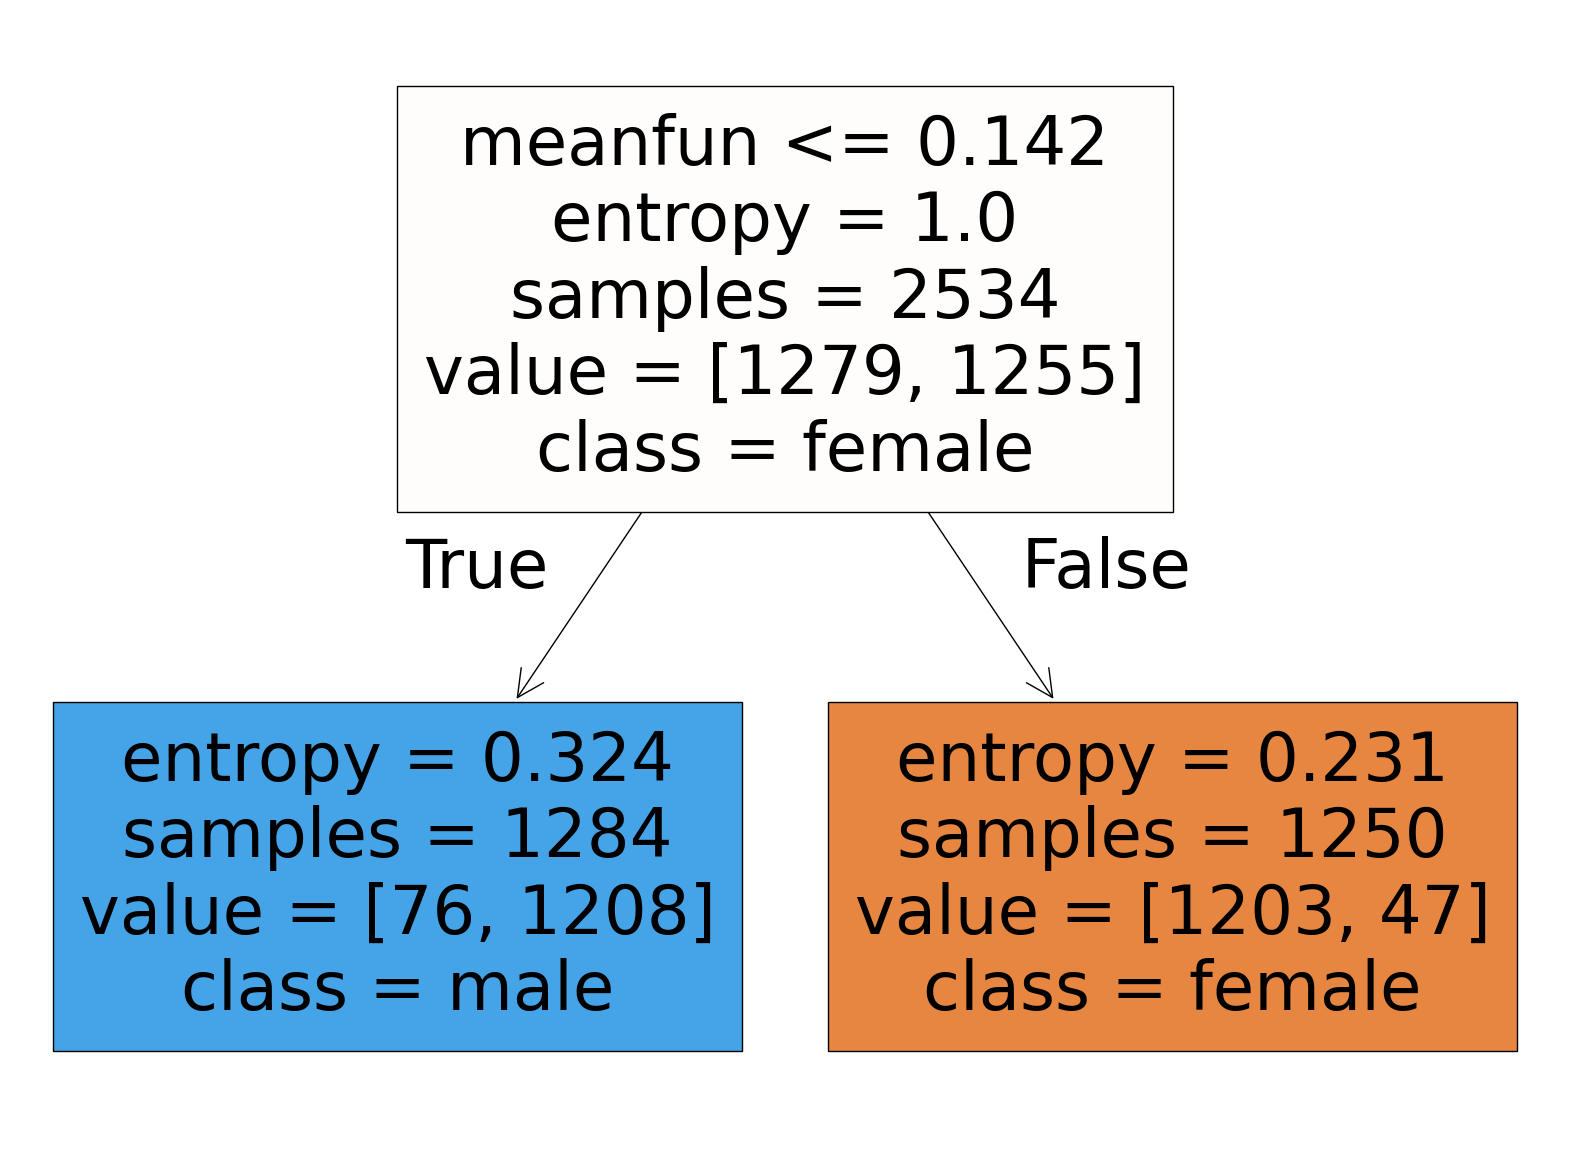

In [ ]:
rf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(20,15))
tree.plot_tree(rf, feature_names=X.columns, class_names=rf.classes_, filled=True)
plt.show()

1. Решающее правило построено на основе minfun.

2. Оптимальное значение <= 0.142.

3.


In [ ]:
condition = X_train['minfun'] <= 0.142

print(f'Процент наблюдений, соответствующих условию: {condition.sum()/len(X_train)*100:.2f}')

Процент наблюдений, соответствующих условию: 99.57


  4. Точность предсказаний

In [ ]:
train_predict = rf.predict(X_train)
test_predict = rf.predict(X_test)
print(f'Train accuracy: {metrics.accuracy_score(y_train, train_predict):.3f}')
print(f'Test accuracy: {metrics.accuracy_score(y_test, test_predict):.3f}')

Train accuracy: 0.951
Test accuracy: 0.967


## Задание 2. Увеличение глубины дерева до 2

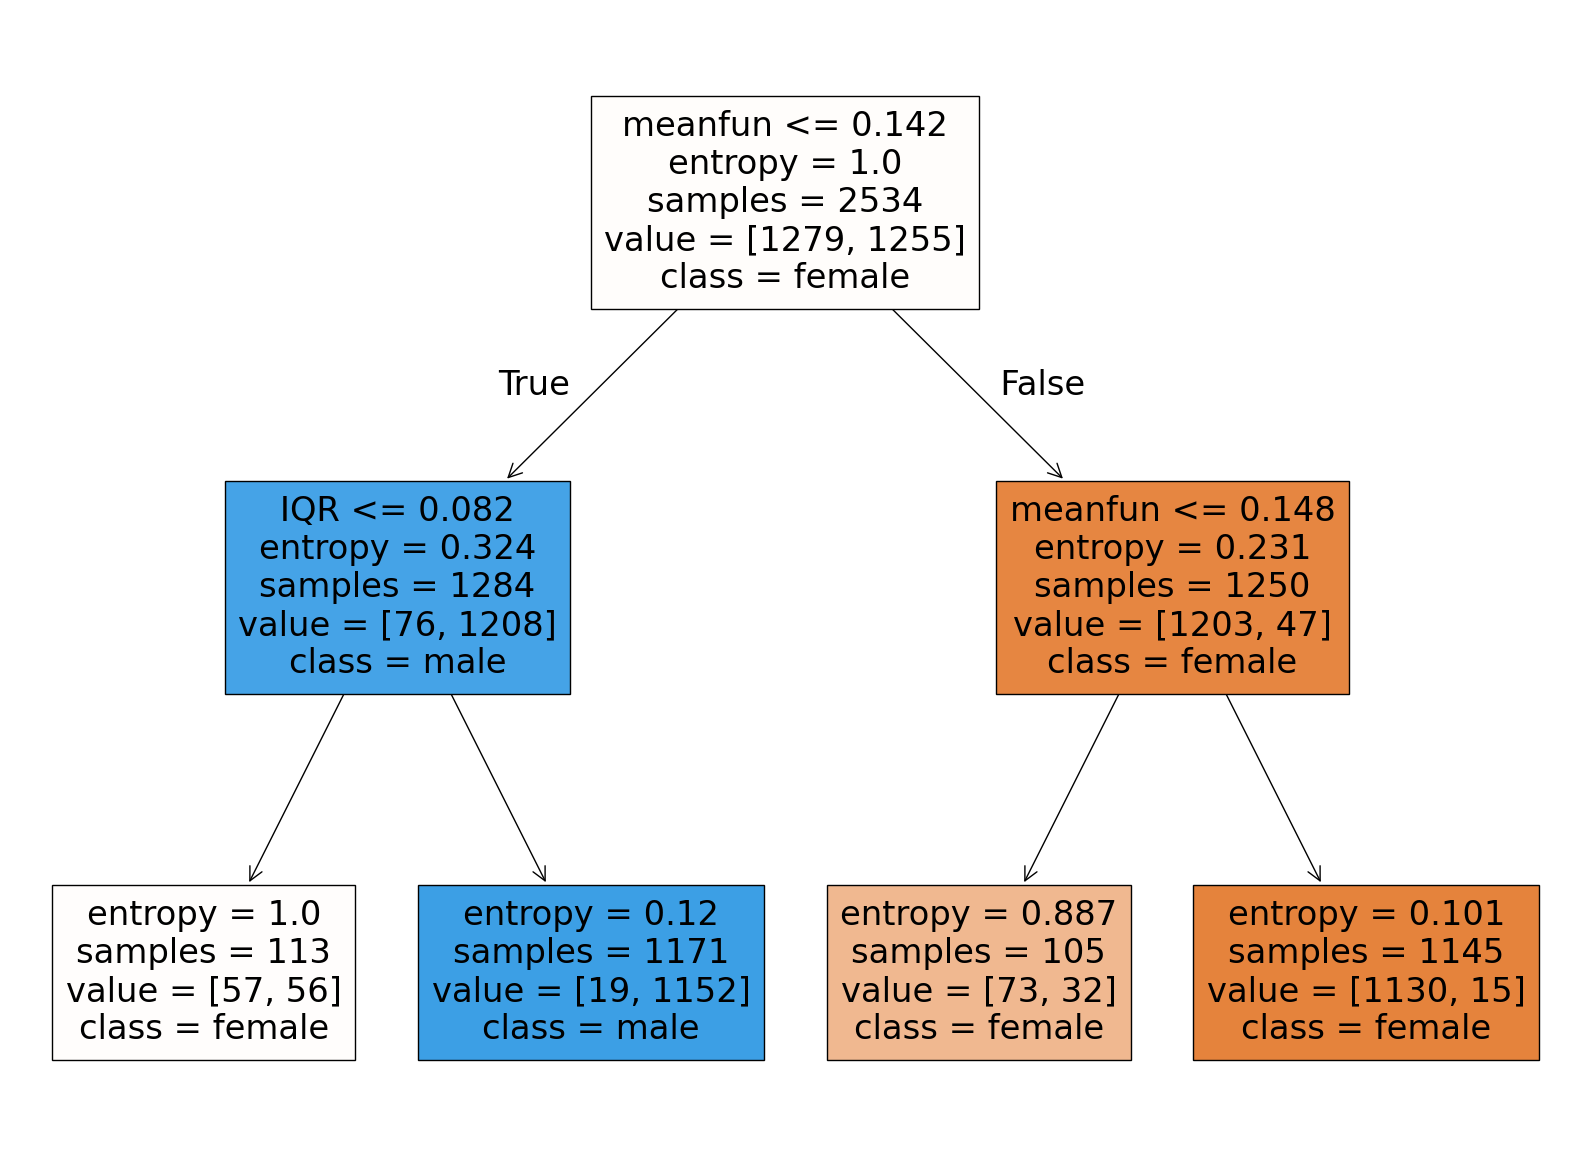

In [ ]:
rf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(20,15))
tree.plot_tree(rf, feature_names=X.columns, class_names=rf.classes_, filled=True)
plt.show()

1. При построении дерева используются следующие факторы: meanfun, IQR
2. Предсказание 'female' встречается 4 раза.


  3. Точность предсказаний

In [ ]:
train_predict = rf.predict(X_train)
test_predict = rf.predict(X_test)
print(f'Train accuracy: {metrics.accuracy_score(y_train, train_predict):.3f}')
print(f'Test accuracy: {metrics.accuracy_score(y_test, test_predict):.3f}')

Train accuracy: 0.952
Test accuracy: 0.942


## Задание 3. Увеличение дерева

In [ ]:
rf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
rf.fit(X_train, y_train)

rf.get_depth()

11

In [ ]:
rf.get_n_leaves()

np.int64(50)

In [ ]:
train_predict = rf.predict(X_train)
test_predict = rf.predict(X_test)
print(f'Train accuracy: {metrics.accuracy_score(y_train, train_predict):.3f}')
print(f'Test accuracy: {metrics.accuracy_score(y_test, test_predict):.3f}')

Train accuracy: 1.000
Test accuracy: 0.972


## Задание 4. Нахождение оптимальных внешних параметров модели

In [ ]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

# Создаем модель
rf = tree.DecisionTreeClassifier(random_state=0)

# Перебираем гипер-параметры
grid_search = model_selection.GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 5}
Best cross-validation score: 0.972


In [ ]:
best_model = grid_search.best_estimator_

test_predict = best_model.predict(X_test)
print(f'Test accuracy with best model: {metrics.accuracy_score(y_test, test_predict):.3f}')

Test accuracy with best model: 0.970


Таким образом, наилучшая модель использует следующие параметры:

1. Энтропия Шеннона;
2. Макс. глубина = 6;
3. Мин. кол-во эл-в разбиения = 5;
4. Точность = 0.97

## Задание 5. Диаграмма важности факторов лучшей модели

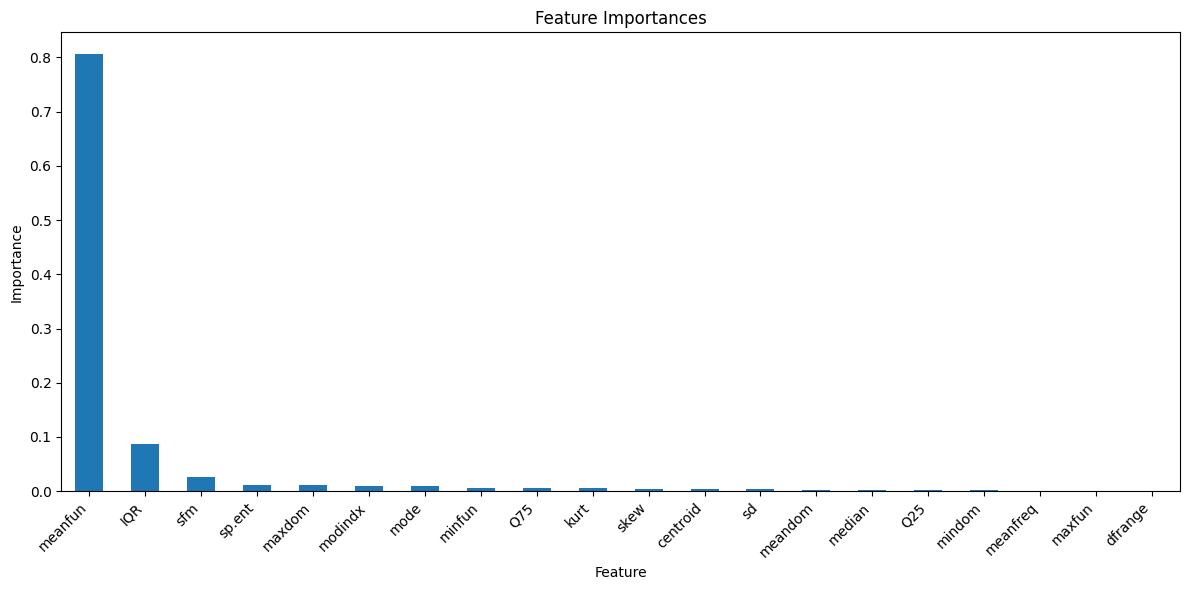

In [ ]:
importances = best_model.feature_importances_
feature_names = X_train.columns

sorted_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Топ-3 фактора по важности:

1. meanfun (средняя основная частота в акустическом спектре)
2. IQR (межквартальных размах)
3. sfm (спектральная равномерность)